# Factors Affecting Flight Delays and Cancellations
##### Explantory Visualizations
#### by Judith Agara

## Investigation Overview


> For the presentation, I focus on presenting plots that answer the following questions:
- When is the best time of day/day/week/time of year to fly to minimise delays? 
- What is the top reason for flight cancellations?
- Are there certain airlines that are home to more delays or cancellations?


## Dataset Overview

> After preliminary wrangling, I had a master dataset of **5,503,507** records (rows) and **18** features (columns) distributed across quantitative and qualitative datatypes. The delayed flights subset contains **1467596** records (rows) and the cancelled flights subset contains **33477** records.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb


# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load the three(3) datasets saved in the last cell of the first notebook into pandas dataframes
all_flights = pd.read_csv('master_dataset.csv')
delay_sub = pd.read_csv('delayed_flights.csv')
cancel_sub = pd.read_csv('cancelled_flights.csv')

In [3]:
def calc_ontime_delay_cancel(column, ordered_list):
    """
    Function to compute ontime, delay and cancel counts and proportion per time series
    
    Input:
        column: time series column to compute by
        ordered_list: ordered list of column's unique values
        
    Return:
        dataframe with time series as index, and counts of ontime, delayed and canceled flights as variables
    """
    # get total counts per time_of_day for all flights, for delayed flights and for cancelled flights
    total = all_flights[column].value_counts()
    delay_counts = delay_sub[column].value_counts()
    cancel_counts = cancel_sub[column].value_counts()

    on_time_counts = []
    delay_cts = []
    cancel_cts = []
    pct_delay = []
    pct_cancel = []
    pct_on_time = []

    # calculate percentages
    for item in ordered_list:
        delay_count = delay_counts[item]
        cancel_count = cancel_counts[item]
        delay_pct = 100*delay_counts[item]/total[item]
        cancel_pct = 100*cancel_counts[item]/total[item]
        on_time_count = total[item] - delay_count - cancel_count
        pct_ontime = 100*on_time_count/total[item]

        on_time_counts.append(on_time_count)
        delay_cts.append(delay_count)
        cancel_cts.append(cancel_count)
        pct_on_time.append(pct_ontime)
        pct_delay.append(delay_pct)
        pct_cancel.append(cancel_pct)
        
    ct_pct_dict = {'ontime_flights':on_time_counts, 'delayed_flights':delay_cts, 'cancelded_flights':cancel_cts}
    ct_pct_df = pd.DataFrame(ct_pct_dict, index=ordered_list)
    
    return ct_pct_df, pct_on_time, pct_delay, pct_cancel

In [4]:
time_of_day = ['Late Night', 'Early Morning', 'Morning', 'Noon', 'Evening', 'Night']
day_of_week = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']
month = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']

In [5]:
time_delay_cancel, ontime, delay, cancel = calc_ontime_delay_cancel('time_of_day', time_of_day)

In [6]:
week_delay_cancel, ontime_week, delay_week, cancel_week = calc_ontime_delay_cancel('day_of_week', day_of_week)

In [7]:
month_delay_cancel, ontime_month, delay_month, cancel_month= calc_ontime_delay_cancel('month', month)

## Time of Day with the most Flight Delays

> Evening, noon and night flights are the most delayed (36% of Evening flights are delayed, 31% of Noon and Night flights are delayed. 23% of morning flights are delayed, 21% of late night flights are delayed and 15% of morning flights are delayed).

> Evening, Night and Noon flights are also the most cancelled.

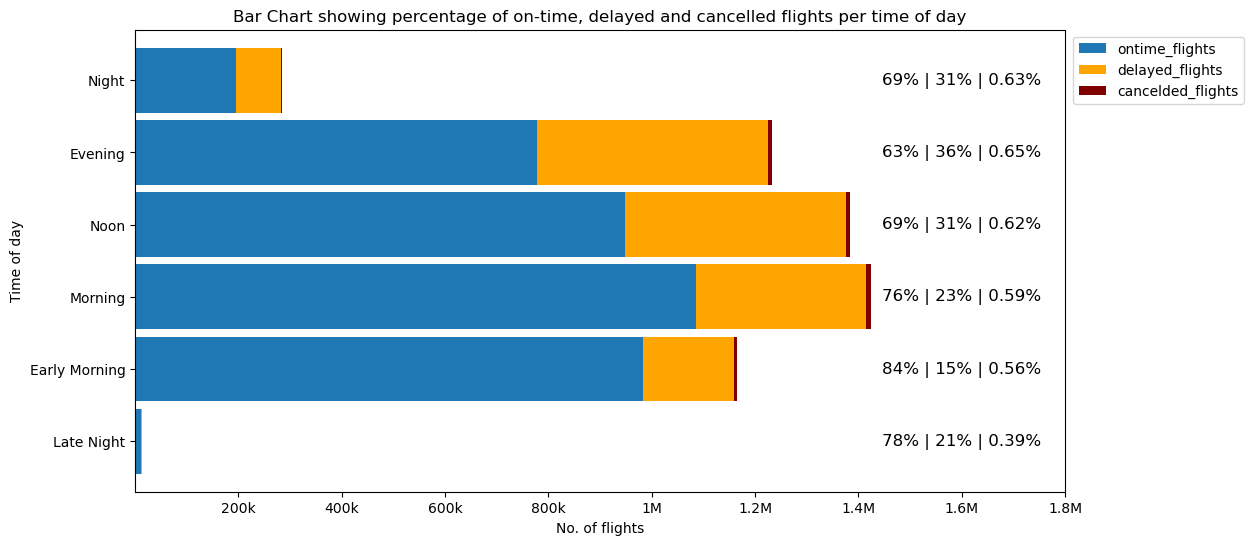

In [11]:
# bar chart showing percentage of on-time, delayed and cancelled flights per time of day
time_delay_cancel.plot(kind='barh', stacked=True, color=[sb.color_palette()[0], 'orange', 'maroon'],
              figsize=(12, 6), width=0.9)
plt.xticks([2e5, 4e5, 6e5, 8e5, 1e6, 1.2e6, 1.4e6, 1.6e6, 1.8e6],
           ['200k', '400k', '600k', '800k', '1M', '1.2M', '1.4M', '1.6M', '1.8M'])
plt.legend(bbox_to_anchor=(1.2, 1));

for i, time in enumerate(time_of_day):
        pct_string = f"{ontime[i]:0.0f}% | {delay[i]:0.0f}% | {cancel[i]:0.02f}%"
        plt.text(1600000, i, pct_string, ha='center', va='center', fontsize=12)

plt.xlabel('No. of flights')
plt.ylabel('Time of day')
plt.title('Bar Chart showing percentage of on-time, delayed and cancelled flights per time of day');

## Day of Week with the most Flight Delays

> Fridays and Thursdays have the highest percentages of delayed and cancelled flights.

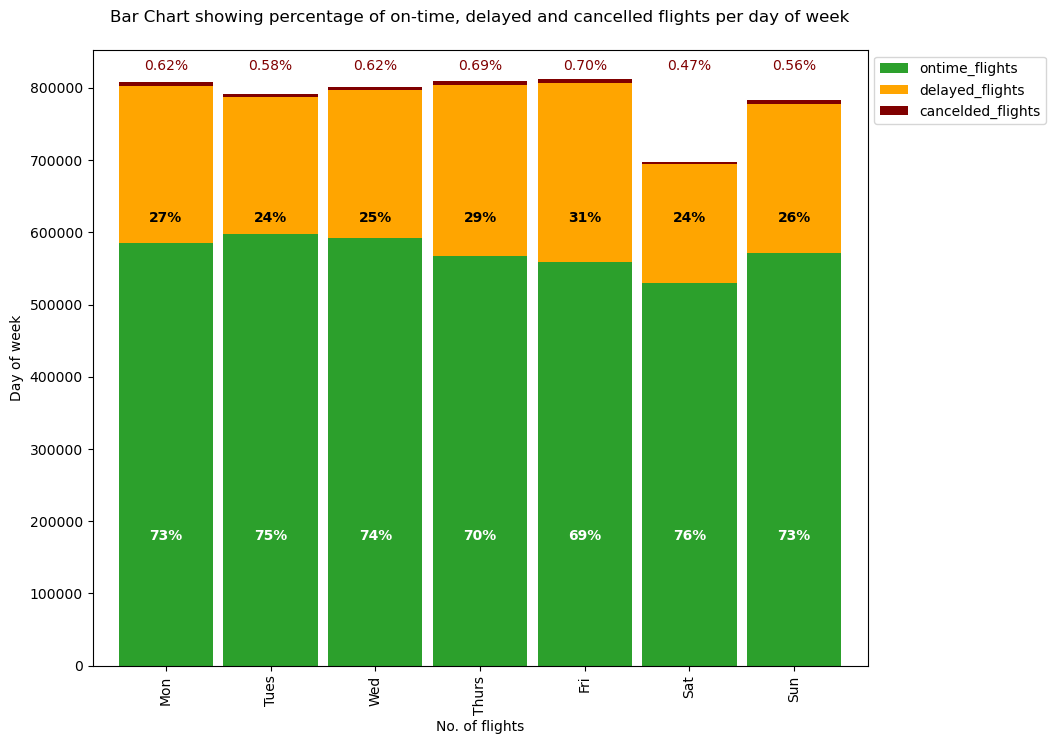

In [12]:
# bar chart showing percentage of on-time, delayed and cancelled flights per day of week
week_delay_cancel.plot(kind='bar', stacked=True, color=[sb.color_palette()[2], 'orange', 'maroon'], width=0.9,
                      figsize=(10, 8))
plt.legend(bbox_to_anchor=(1, 1));

for i, time in enumerate(day_of_week):
        ontime_string = f"{ontime_week[i]:0.0f}%"
        plt.text(i, 180000, ontime_string, ha='center', va='center', fontsize=10, color='white', weight='bold')
        delay_string = f"{delay_week[i]:0.0f}%"
        plt.text(i, 620000, delay_string, ha='center', va='center', fontsize=10, weight='bold')
        cancel_string = f"{cancel_week[i]:0.02f}%"
        plt.text(i, 830000, cancel_string, ha='center', va='center', fontsize=10, color='maroon')

        plt.xlabel('No. of flights')
plt.ylabel('Day of week')
plt.title('Bar Chart showing percentage of on-time, delayed and cancelled flights per day of week', pad=20);

## Month of year with the most Flight Delays

> **December, October, June and July** have the most delays while **December, January and February** have the most cancellations.

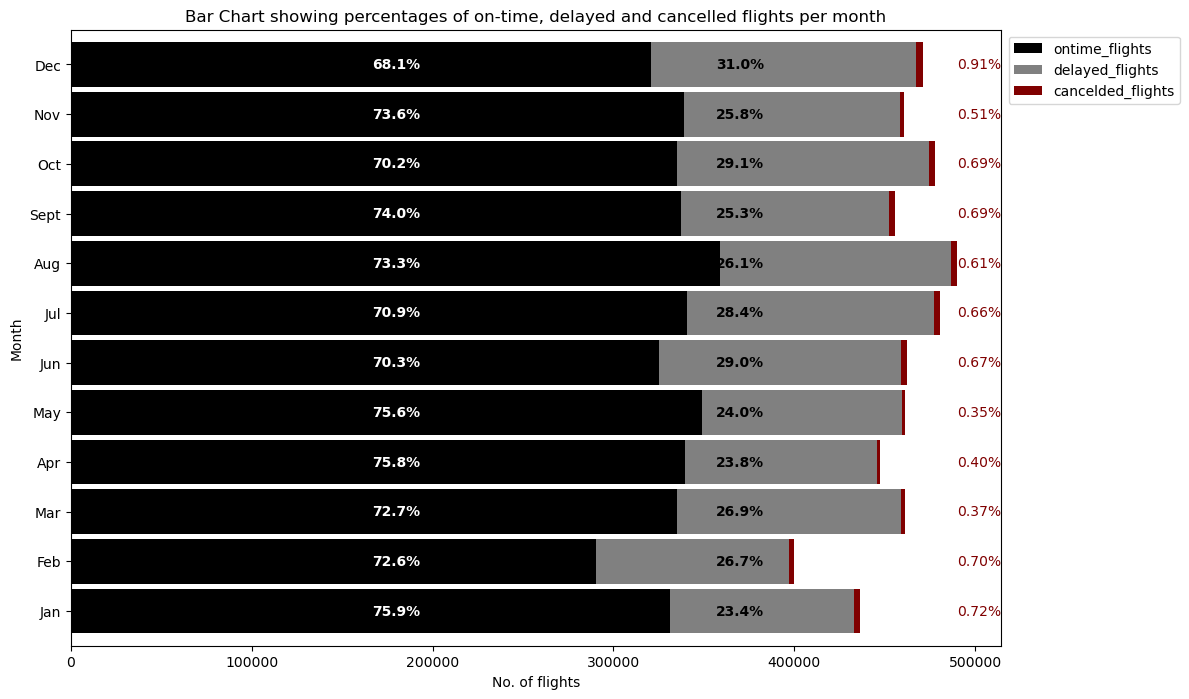

In [13]:
# bar chart showing percentage of on-time, delayed and cancelled flights per month
month_delay_cancel.plot(kind='barh', stacked=True, color=['black', 'grey', 'maroon'],
              figsize=(12, 8), width=0.9)
plt.legend(bbox_to_anchor=(1.2, 1));

for i, time in enumerate(month):
        ontime_string = f"{ontime_month[i]:0.1f}%"
        plt.text(180000, i, ontime_string, ha='center', va='center', fontsize=10, color='white', weight='bold')
        delay_string = f"{delay_month[i]:0.1f}%"
        plt.text(370000, i, delay_string, ha='center', va='center', fontsize=10, weight='bold')
        cancel_string = f"{cancel_month[i]:0.02f}%"
        plt.text(502000, i, cancel_string, ha='center', va='center', fontsize=10, color='maroon')

plt.xlabel('No. of flights')
plt.ylabel('Month')
plt.title('Bar Chart showing percentages of on-time, delayed and cancelled flights per month');

## Top reason for flight cancellation

> The top reason for flight cancellation is the carrier (airline).

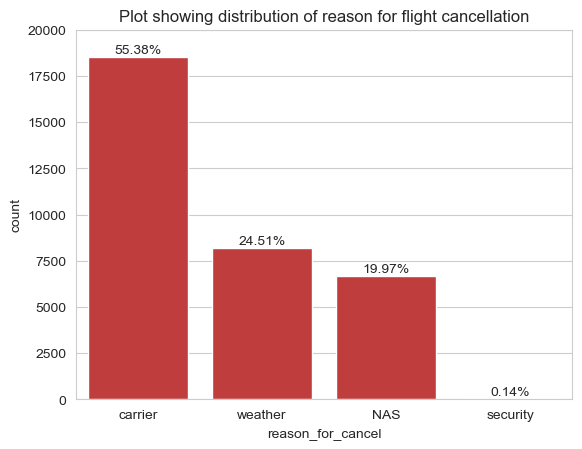

In [14]:
# countplot of reason for cancel
sb.set_style('whitegrid')
sb.countplot(data=cancel_sub, x='reason_for_cancel', color=sb.color_palette()[3],
              order=cancel_sub['reason_for_cancel'].value_counts().index)
plt.ylim(0, 20000)
for i in range(cancel_sub['reason_for_cancel'].nunique()):
        count = cancel_sub['reason_for_cancel'].value_counts()[i]
        total = cancel_sub['reason_for_cancel'].count()
        pct_string = f"{100*count/total:0.2f}%"
        plt.text(i, count+350, pct_string, ha='center', va='center')
plt.title('Plot showing distribution of reason for flight cancellation');

## Top 10 Airlines with Delays
> Atlantic Southeast Airlines has the most delays (over 36%). It is followed be American Eagle Airlines with about 30% of scheduled flights delayed.

In [15]:
# to get and plot percentagesb of flights delayed and cancelled per carrier

# get total counts per carrier for all flights, for delayed flights and for cancelled flights
total = all_flights.carrier.value_counts()
delay_counts = delay_sub.carrier.value_counts()
cancel_counts = cancel_sub.carrier.value_counts()


pct_delay = []
pct_cancel = []

# calculate percentages
for carrier in delay_counts.index:
    delay_pct = 100*delay_counts[carrier]/total[carrier]
    pct_delay.append(delay_pct)
for carrier in cancel_counts.index:
    cancel_pct = 100*cancel_counts[carrier]/total[carrier]    
    pct_cancel.append(cancel_pct)

# set dataframes to plot:
delay = pd.DataFrame({"pct":pct_delay}, index=delay_counts.index).sort_values(by='pct', ascending=False)
cancel = pd.DataFrame({"pct":pct_cancel}, index=cancel_counts.index).sort_values(by='pct', ascending=False)
# plot percentages - delay first
sb.set_style('darkgrid')   

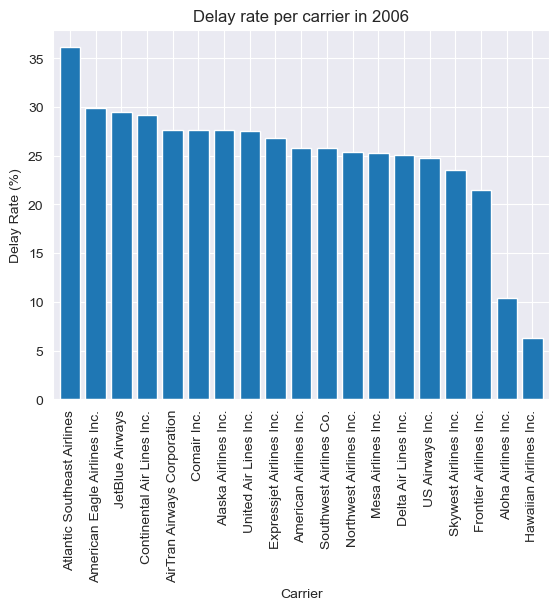

In [16]:
delay.plot(kind='bar', width=0.8, legend=None, xlabel='Carrier', ylabel='Delay Rate (%)',
           title='Delay rate per carrier in 2006');

## Top 10 Airlines with Cancellations
Mesa Airlines followed by Atlantic Southeast Airlines has the most cancellations. Atlantic Southeast Airlines is associated with lots of delays and cancellations and concidentally when looking at cities, Atlanta is home to more delays.

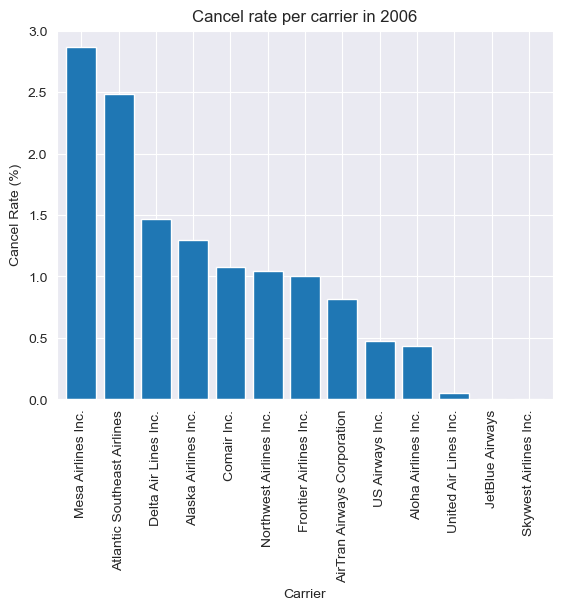

In [17]:
cancel.plot(kind='bar', width=0.8, legend=None, xlabel='Carrier', ylabel='Cancel Rate (%)',
           title='Cancel rate per carrier in 2006');

### Generate Slideshow
Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show.  

In [18]:
# Use this command if you are running this file in local
!jupyter nbconvert Airline_On_Time_Performance_Data_Exploration_Part_II_slide_deck --to slides --post serve --no-input --no-prompt

^C


> In the classroom workspace, the generated HTML slideshow will be placed in the home folder. 

> In local machines, the command above should open a tab in your web browser where you can scroll through your presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent slide. Make sure you remove all of the quote-formatted guide notes like this one before you finish your presentation! At last, you can stop the Kernel. 

### Submission
If you are using classroom workspace, you can choose from the following two ways of submission:

1. **Submit from the workspace**. Make sure you have removed the example project from the /home/workspace directory. You must submit the following files:
   - Part_I_notebook.ipynb
   - Part_I_notebook.html or pdf
   - Part_II_notebook.ipynb
   - Part_I_slides.html
   - README.md
   - dataset (optional)


2. **Submit a zip file on the last page of this project lesson**. In this case, open the Jupyter terminal and run the command below to generate a ZIP file. 
```bash
zip -r my_project.zip .
```
The command abobve will ZIP every file present in your /home/workspace directory. Next, you can download the zip to your local, and follow the instructions on the last page of this project lesson.
